Importing packages

In [95]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

Data Set Description:

Formally, given sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist.

id : The id associated with the tweets in the given dataset.

tweets : The tweets collected from various sources and having either positive or negative sentiments associated with it.

label : A tweet with label ‘0’ is of positive sentiment while a tweet with label ‘1’ is of negative sentiment

In [96]:
data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [97]:
data.shape

(31962, 3)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## 1. Data Pre-Processing
Data cleaning and preprocessing (at minimum have the following:  Removing unnecessary columns or data, Removing Twitter Handles( @user ), Removing punctuation, numbers, special characters, Removing stop words, Tokenization, and Stemming, TFIDF vectors, POS tagging, checking for missing values , train/test split of data). 

#### Removing unnecessary columns or data

In [99]:
# Delete the "id" column from the dataframe
data = data.drop("id", axis=1)

In [100]:
data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


#### Removing Twitter Handles(@user)

In [101]:
def remove_pattern(text, pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [102]:
data['Tweets'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")
data.head()

,label,tweet,Tweets
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation


#### Removing Punctuations, Numbers, and Special Characters

In [103]:
data['Tweets'] = data['Tweets'].str.replace("[^a-zA-Z#]", " ")

In [104]:
data.head(10)

,label,tweet,Tweets
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide society now #motivation
5,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


#### Removing stop words

In [105]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
from nltk.corpus import stopwords

data['Tweets'] = data['Tweets'].apply(lambda x: ' '.join([w for w in x.split() if w not in stopwords.words('english')]))
data.head(10)

,label,tweet,Tweets
0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit use cause offer wheelchair...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,#model love u take u time ur
4,0,factsguide: society now #motivation,factsguide society #motivation
5,0,[2/2] huge fan fare and big talking before the...,huge fan fare big talking leave chaos pay disp...
6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,0,the next school year is the year for exams.ð...,next school year year exams think #school #exa...
8,0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,0,@user @user welcome here ! i'm it's so #gr...,welcome #gr


#### Removing short words

In [107]:
data['Tweets'] = data['Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

data.head(10)

,label,tweet,Tweets
0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,#model love take time
4,0,factsguide: society now #motivation,factsguide society #motivation
5,0,[2/2] huge fan fare and big talking before the...,huge fare talking leave chaos disputes #allsho...
6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,0,the next school year is the year for exams.ð...,next school year year exams think #school #exa...
8,0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,0,@user @user welcome here ! i'm it's so #gr...,welcome


#### Tokenization

In [108]:
tokenized_tweet = data['Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, cause, offer, wheelcha...
2                                    [bihday, majesty]
3                           [#model, love, take, time]
4                   [factsguide, society, #motivation]
Name: Tweets, dtype: object

#### Lemmatization

In [109]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [110]:
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

tokenized_tweet.head()

0    [father, dysfunctional, selfish, drag, kid, dy...
1    [thanks, #lyft, credit, cause, offer, wheelcha...
2                                    [bihday, majesty]
3                           [#model, love, take, time]
4                   [factsguide, society, #motivation]
Name: Tweets, dtype: object

In [111]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['Tweets'] = tokenized_tweet
data.head()

,label,tweet,Tweets
0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,#model love take time
4,0,factsguide: society now #motivation,factsguide society #motivation


#### PoS Tagging

In [112]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [113]:
from nltk import sent_tokenize
from nltk import word_tokenize

text = sent_tokenize(str(data['Tweets']))
#Tokenizing words :
for s in text:
  tokenized_words = word_tokenize(s)
  for words in tokenized_words:
    tagged_words = nltk.pos_tag(tokenized_words)
    
tagged_words

[('0', 'CD'),
 ('father', 'JJ'),
 ('dysfunctional', 'JJ'),
 ('selfish', 'JJ'),
 ('drag', 'NN'),
 ('kid', 'NN'),
 ('dysfunct', 'NN'),
 ('...', ':'),
 ('1', 'CD'),
 ('thanks', 'NNS'),
 ('#', '#'),
 ('lyft', 'JJ'),
 ('credit', 'NN'),
 ('cause', 'NN'),
 ('offer', 'VBP'),
 ('wheelchair', 'NN'),
 ('van', 'NN'),
 ('...', ':'),
 ('2', 'CD'),
 ('bihday', 'NN'),
 ('majesty', 'VBD'),
 ('3', 'CD'),
 ('#', '#'),
 ('model', 'NN'),
 ('love', 'VB'),
 ('take', 'NN'),
 ('time', 'NN'),
 ('4', 'CD'),
 ('factsguide', 'JJ'),
 ('society', 'NN'),
 ('#', '#'),
 ('motivation', 'NN'),
 ('...', ':'),
 ('31957', 'CD'),
 ('youuu', '$'),
 ('31958', 'CD'),
 ('nina', 'JJ'),
 ('turner', 'NN'),
 ('airwave', 'VBP'),
 ('trying', 'VBG'),
 ('wrap', 'NN'),
 ('mantle', 'FW'),
 ('genuine', 'NN'),
 ('...', ':'),
 ('31959', 'CD'),
 ('listening', 'NN'),
 ('song', 'NN'),
 ('monday', 'JJ'),
 ('morning', 'NN'),
 ('work', 'NN'),
 ('31960', 'CD'),
 ('#', '#'),
 ('sikh', 'JJ'),
 ('#', '#'),
 ('temple', 'NN'),
 ('vandalised', 'VBD'),
 (

## 2. Data Visualiation and analysis

#### Distribution of sentiments in the data

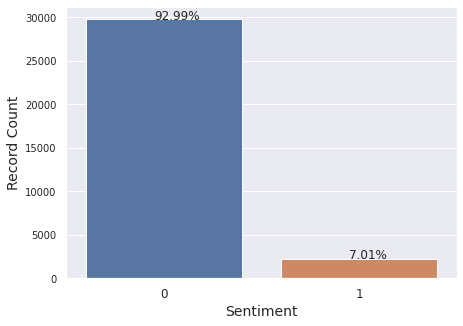

In [114]:
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()


plt.figure(figsize=(7,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = data['label'], data=data)
plt.xticks(size=12)
plt.xlabel("Sentiment", size=14)
plt.yticks(size=10)
plt.ylabel("Record Count", size=14) 
without_hue(ax, data['label'])

#### Wordcloud for Positive tweets

In [115]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [116]:
all_words_positive = ' '.join(text for text in data['Tweets'][data['label']==0])

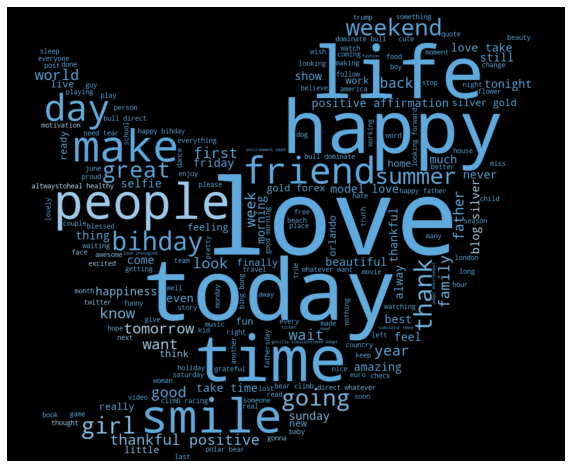

In [117]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

#### Wordcloud for Negative tweets

In [118]:
all_words_negative = ' '.join(text for text in data['Tweets'][data['label']==1])

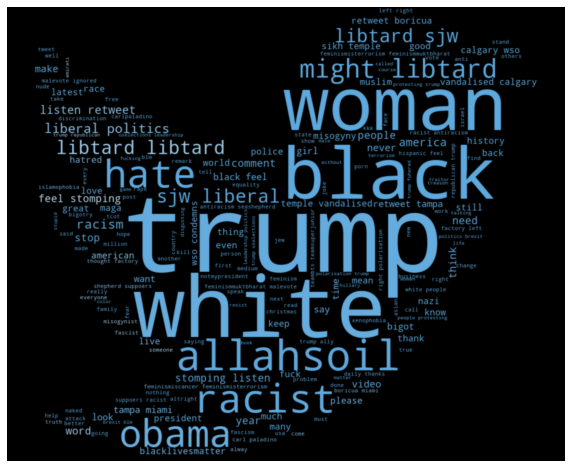

In [119]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

#### Top 10 Hashtag Bar Chart 

In [120]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [121]:
hashtag_positive = Hashtags_Extract(data['Tweets'][data['label']==0])
hashtag_positive_unnest = sum(hashtag_positive,[])

In [125]:
word_freq_positive = nltk.FreqDist(hashtag_positive_unnest)
word_freq_positive

df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})
df_positive.head(10)

,Hashtags,Count
0,run,34
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,365
5,motivation,168
6,allshowandnogo,1
7,school,27
8,exams,6
9,hate,25


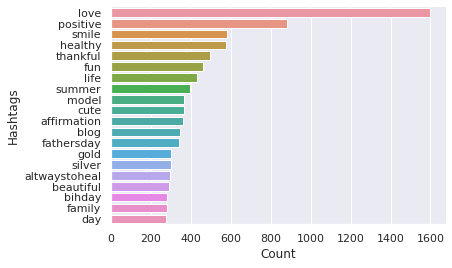

In [126]:
df_positive_plot = df_positive.nlargest(20, columns='Count')

sns.barplot(data=df_positive_plot, y='Hashtags', x='Count')
sns.despine()

In [ ]:
hashtag_negative = Hashtags_Extract(data['Tweets'][data['label']==1])
hashtag_negative_unnest = sum(hashtag_negative,[])

In [127]:
word_freq_negative = nltk.FreqDist(hashtag_negative_unnest)
word_freq_negative

df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})
df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphins,3
7,thecove,4
8,neverump,8
9,xenophobia,12


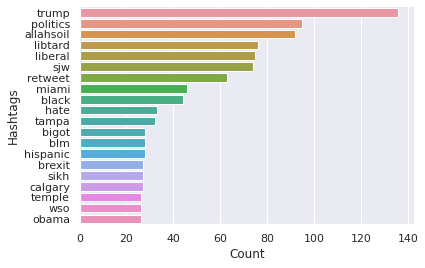

In [33]:
df_negative_plot = df_negative.nlargest(20, columns='Count')
sns.barplot(data= df_negative_plot, y='Hashtags', x='Count')
sns.despine()

## 3. Model

#### TF-IDF features

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

tfidf_matrix = tfidf.fit_transform(data['Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

#### Train/test split of data

In [130]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_tfidf_matrix, data['label'], test_size=0.3, random_state=17)

#### Build Logistic Regression Model

In [131]:
from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression(random_state=0, solver='lbfgs')

#### Fit the model

In [132]:
Log_Reg.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predict using the model

In [133]:
prediction_tfidf = Log_Reg.predict_proba(x_valid)
prediction_tfidf

array([[0.98317685, 0.01682315],
       [0.96413418, 0.03586582],
       [0.94243096, 0.05756904],
       ...,
       [0.93589083, 0.06410917],
       [0.97255606, 0.02744394],
       [0.98618927, 0.01381073]])

#### F1 score for the model

In [134]:
from sklearn.metrics import f1_score

prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid, prediction_int)

print("F1 Score for the Logistic Regression model: ", log_tfidf)

F1 Score for the Logistic Regression model:  0.5704225352112676


#### Model Accuracy

In [135]:
from sklearn.metrics import accuracy_score

score_LR = accuracy_score(y_valid, prediction_int)

print("Accuracy of Logistic Regression model: ", score_LR)

Accuracy of Logistic Regression model:  0.9491083533215142
